In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
deliveres = pd.read_csv("C:/Users/utkhare/Desktop/Documents/Onwards2015.csv")

C:\Users\utkhare\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


###  Goal

In [3]:
# Compare RPI and Strike Rates batsmen who bat in the last 5 overs 

### Inital DF for IPL 2015 - 2018

In [4]:
def getEndOverStats(df):
    
    # get all batsmen who bat consistently during > 15 overs
    batsman_scores = pd.DataFrame ( df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(20) ).reset_index()
    batsman_scores.head()

    # Count of balls faced during death overs
    batsman_balls = pd.DataFrame ( 
        df[df.over >= 15].groupby('batsman')['ball'].count().sort_values(ascending = False).head(40) ).reset_index()

    # Min 50 balls faced
    batsman_balls = batsman_balls[batsman_balls.ball >= 50]

    # Number of innings during death overs
    batsman_innings = pd.DataFrame ( 
        df[df.over >= 15].groupby('batsman')['id'].nunique().sort_values(ascending = False).head(50) ).reset_index()

    batsman_final = batsman_scores.merge(batsman_balls, on = 'batsman', how = 'left')
    batsman_final = batsman_final.merge(batsman_innings, on = 'batsman', how = 'left')

    batsman_final['strike_rate'] = 100 * batsman_final['batsman_runs'] / batsman_final['ball']
    batsman_final['rpi'] = batsman_final['batsman_runs'] / batsman_final['id']

    return batsman_final

In [5]:
def plot_df(df):
    plt.figure(figsize = (16,8))
    plt.scatter(df.strike_rate, df.rpi)

    for i in range(len(df)): 
        if (df['batsman'][i] == 'MS Dhoni'): 
            plt.text(df['strike_rate'][i], df['rpi'][i], df['batsman'][i], fontsize = 15)
        else: 
            plt.text(df['strike_rate'][i], df['rpi'][i], df['batsman'][i])

    plt.axvline(df['strike_rate'].median() , ls = '--', color = 'grey')
    plt.axhline(df['rpi'].median() , ls = '--', color = 'grey')
    plt.title("Death Over Performance. Min 100 balls faced. IPL 2015 - 2018")
    plt.xlabel("Strike Rate")
    plt.ylabel("Runs Per Innings in Death Overs")
    plt.show()

In [6]:
# First Comparison between 2015-2018  
df = deliveres.copy()
df = df[(df.id >= 829705) & (df.id <= 1136620 )]
df = df[df.over >= 15]
df = getEndOverStats(df)


# Second Comparison between 2019 - 2020
new_df = deliveres.copy()
new_df = new_df[(new_df.id >= 1175356) & (new_df.id <= 1237181 )]
new_df = new_df[new_df.over >= 15]
new_df = getEndOverStats(new_df)


In [7]:
# debug 
new_df['strike_rate'].median() , df['strike_rate'].median() , new_df['rpi'].median() , df['rpi'].median()

(174.71883786316778,
 166.21220450797142,
 17.360526315789475,
 15.922459893048128)

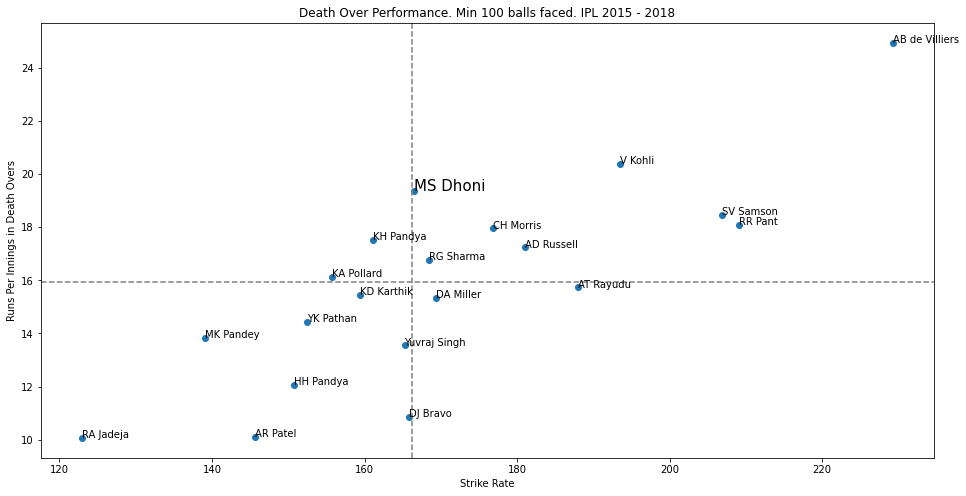

In [8]:
plot_df(df)

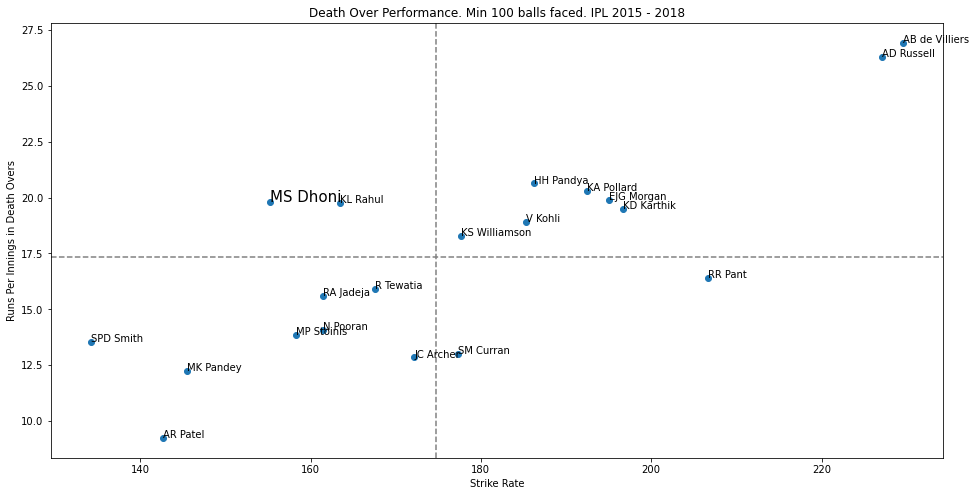

In [9]:
plot_df(new_df)

In [10]:
df.head(20)

,batsman,batsman_runs,ball,id,strike_rate,rpi
0,MS Dhoni,891,535,46,166.542056,19.369565
1,KA Pollard,548,352,34,155.681818,16.117647
2,YK Pathan,462,303,32,152.475248,14.437500
3,KD Karthik,448,281,29,159.430605,15.448276
4,HH Pandya,434,288,36,150.694444,12.055556
5,AD Russell,431,238,25,181.092437,17.240000
6,AB de Villiers,399,174,16,229.310345,24.937500
7,V Kohli,387,200,19,193.500000,20.368421
8,RG Sharma,369,219,22,168.493151,16.772727
9,CH Morris,359,203,20,176.847291,17.950000


In [11]:
new_df.head(20)

,batsman,batsman_runs,ball,id,strike_rate,rpi
0,HH Pandya,516,277,25,186.281588,20.640000
1,KA Pollard,406,211,20,192.417062,20.300000
2,AB de Villiers,404,176,15,229.545455,26.933333
3,MS Dhoni,396,255,20,155.294118,19.800000
4,AD Russell,368,162,14,227.160494,26.285714
5,RR Pant,312,151,19,206.622517,16.421053
6,RA Jadeja,281,174,18,161.494253,15.611111
7,MP Stoinis,277,175,20,158.285714,13.850000
8,KL Rahul,237,145,12,163.448276,19.750000
9,KD Karthik,234,119,12,196.638655,19.500000
